In [44]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [45]:

def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


# قسمت اول 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 0.1 | Accuracy: 0.8182


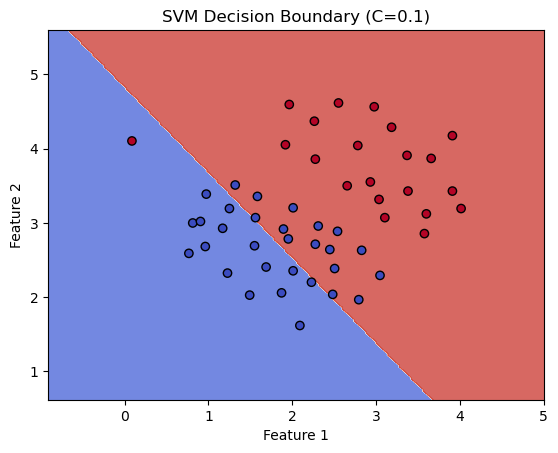

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 1 | Accuracy: 0.8182


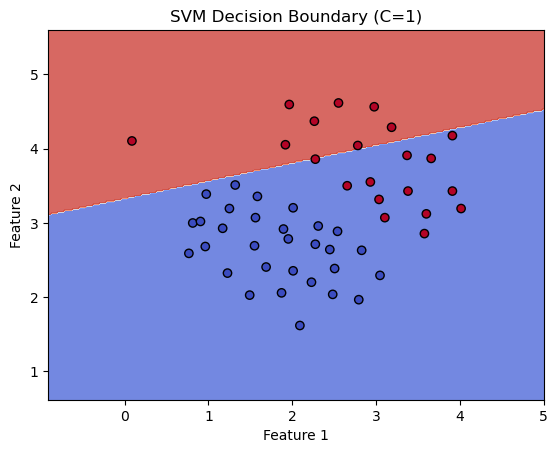

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 10 | Accuracy: 1.0000


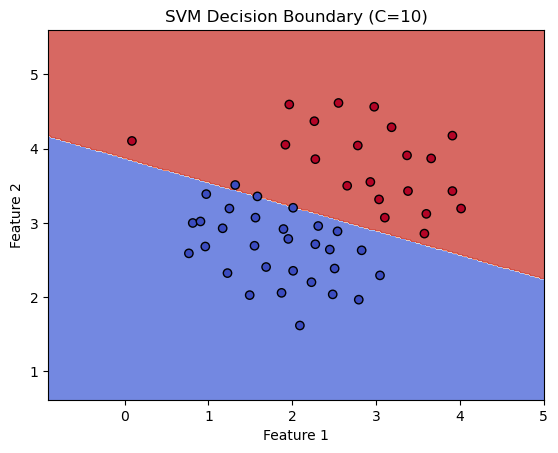

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 100 | Accuracy: 1.0000


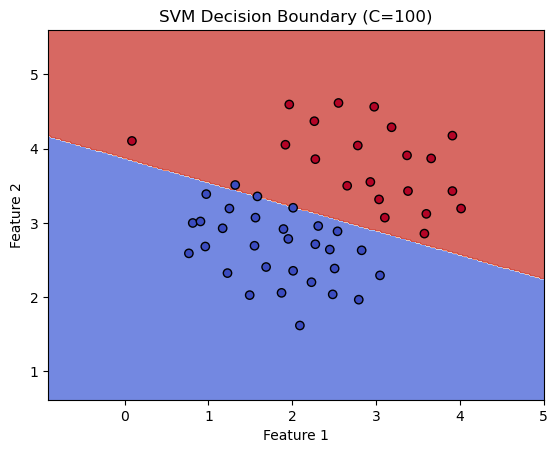

In [46]:



# Load the data
data = np.loadtxt("SMO-dataset-1.csv", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define values for C
C_values = [0.1, 1, 10, 100]

# Iterate over different values of C
for C in C_values:
    # Train SVM with SMO
    clf = SVC(kernel='linear', C=C, tol=0.001, max_iter=5)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"C: {C} | Accuracy: {accuracy:.4f}")

    # Plot decision boundary
    plot_decision_boundary(X, y, clf, f"SVM Decision Boundary (C={C})")
    plt.show()


# قسمت دوم 

In [47]:
def gaussianKernel(x1, x2, sigma):
    # Ensure that x1 and x2 are column vectors
    x1 = x1.ravel()
    x2 = x2.ravel()
    
    
    sim = np.exp(-np.sum(np.square(x1 - x2)) / (2 * (sigma**2)))
    return sim


x1 = np.array([1, 2, 1])
x2 = np.array([-1, 4, 0])
sigma = 2.0

K = gaussianKernel(x1, x2, sigma)
print(K)




0.32465246735834974


In [63]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def gaussianKernelGramMatrixFull(X1, X2, sigma=0.1):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            x1 = x1.flatten()
            x2 = x2.flatten()
            gram_matrix[i, j] = np.exp(-np.sum(np.power((x1 - x2), 2)) / float(2 * (sigma**2)))
    return gram_matrix

def plot_decision_boundary(X, y, model, title):
    h = 0.2  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use X_train for generating predictions, as the model was trained on X_train
    Z = model.predict(gaussianKernelGramMatrixFull(X_train, np.c_[xx.ravel(), yy.ravel()]))

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

# Load the data
data = np.loadtxt("SMO-dataset-2.csv", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with precomputed Gaussian kernel matrix
gram_matrix_train = gaussianKernelGramMatrixFull(X_train, X_train)
clf = SVC(kernel="precomputed", C=1, tol=0.001, max_iter=5)
clf.fit(gram_matrix_train, y_train)

# Predict using the trained model on the test data
y_pred = clf.predict(gaussianKernelGramMatrixFull(X_test, X_train))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 52.02%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = np.loadtxt("dataset3.csv", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for C and gamma
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
              'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}

# Create an SVM classifier with a Gaussian kernel
svm = SVC(kernel='rbf')

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_svm.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
